In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from func.EI_calculation import local_ei_cell
from func.EI_calculation import homo_ca_ei
from func.EI_calculation import ei_of_local
from ca_generate import cellular_automaton_homo
from ca_generate import cellular_automaton2
plt.rcParams['figure.figsize'] = (15, 12)
%matplotlib inline

# 已知动力学 动力学异质 噪音不同

# Cal EI of local variables

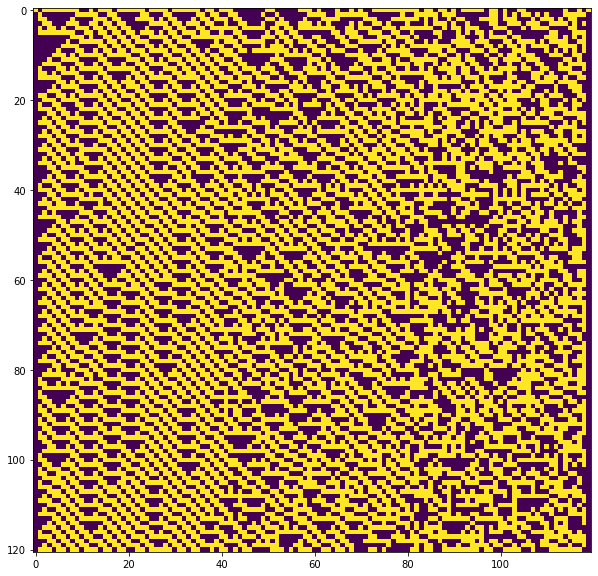

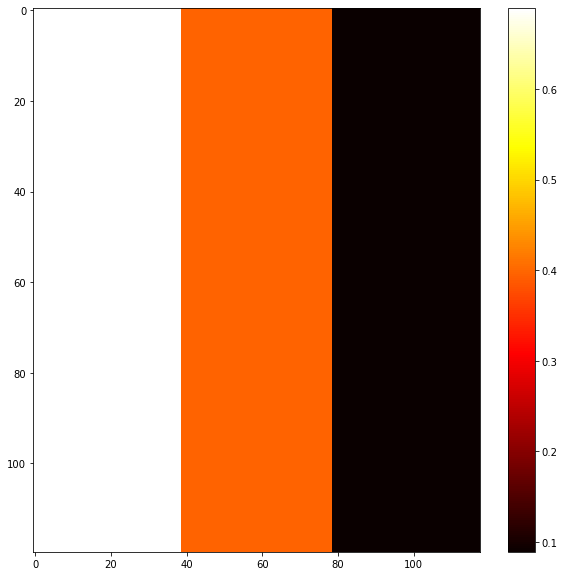

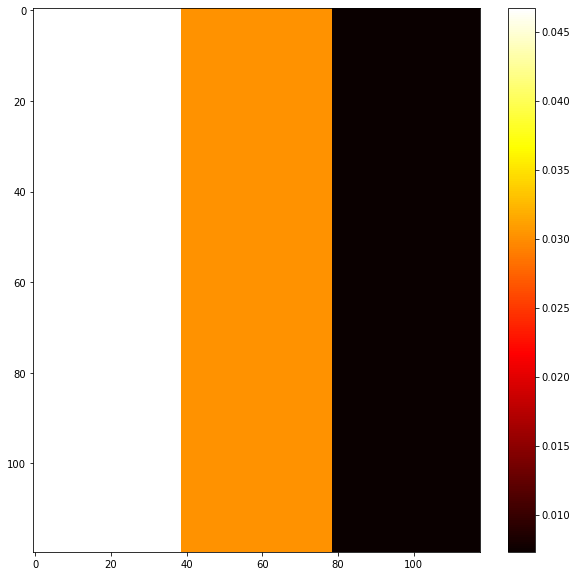

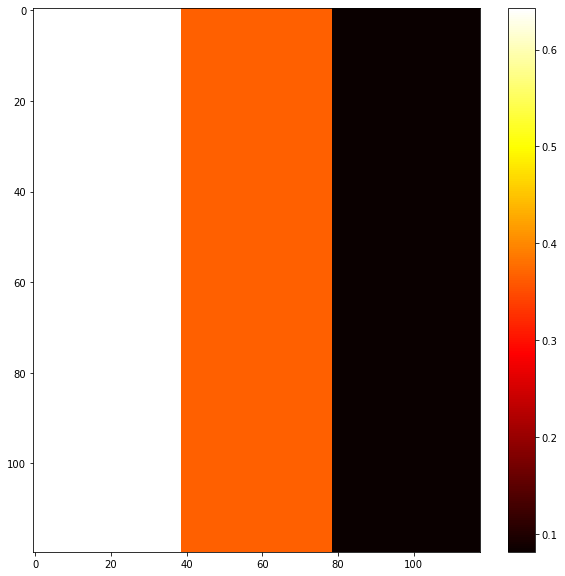

In [33]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix1, ei_matrix2, syn_matrix= cellular_automaton_homo(rule=110, generations=120, p0_list=[0.01,0.1,0.3], size=120,middle_size=1)

# 朗顿参数&Wolframe分类

In [41]:
def trans10_to_base(number, base = 2, min_length=0):
    
    if min_length < 1:
        raise ValueError("Minimum length must be at least 1")
    
    if number == 0:
        return '0' * min_length

    digits = []
    while number > 0:
        digits.insert(0, str(number % base))
        number //= base

    # 将数字列表转换为字符串，并在前面填充字符以达到最小长度
    padded_digits = ''.join(digits).zfill(min_length)

    return padded_digits

def langton(rule):
    strs = trans10_to_base(rule, min_length=8)
    n = strs.count('1')
    lambdas = n / 8
    return lambdas

langton(110)

0.625

In [42]:
from ca_generate import generate_markov
cell_ei_list1 = []
cell_ei_list2 = []
syn_list = []
lam_list = []
middle_size = 1
for rule in range(256):
    markov_m = generate_markov(p0=0, rule=rule, middle_size=middle_size)
    ei1 = homo_ca_ei(markov_m,middle_size)
    ei2,_ = ei_of_local(markov_m,middle_size)
    #print('rule = '+str(rule)+' ei ='+str(ei))
    cell_ei_list1.append(ei1)
    cell_ei_list2.append(ei2)
    syn_list.append(ei1-ei2)
    lam_list.append(langton(rule))

cell_ei_list1

[0.0,
 0.25,
 0.25,
 0.5,
 0.25,
 0.0,
 0.5,
 0.25,
 0.25,
 0.5,
 0.0,
 0.25,
 0.5,
 0.25,
 0.25,
 0.0,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.5,
 0.75,
 0.75,
 1.0,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 1.0,
 0.5,
 0.75,
 1.0,
 0.75,
 0.75,
 0.5,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.0,
 0.25,
 0.25,
 0.5,
 0.25,
 0.0,
 0.5,
 0.25,
 0.25,
 0.5,
 0.0,
 0.25,
 0.5,
 0.25,
 0.25,
 0.0,
 0.5,
 0.75,
 0.75,
 1.0,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 1.0,
 0.5,
 0.75,
 1.0,
 0.75,
 0.75,
 0.5,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.25,
 0.5,
 0.5,
 0.75,
 0.5,
 0.25,
 0.75,
 0.5,
 0.5,
 0.75,
 0.25,
 0.5,
 0.75,
 0.5,
 0.5,
 0.25,
 0.5,
 0.75,
 0.75,
 1.0,
 0.75,
 0.5,
 1.0,
 0.75,
 0.75,
 1.0,

In [43]:
#woframe
ca_classification = {
    'Class I': [8, 0, 32, 40, 128, 136, 160, 168],
    'Class II': [
        1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 
        19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 
        37, 38, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 
        72, 73, 74, 76, 77, 78, 94, 104, 108, 130, 132, 
        134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 
        172, 178, 184, 200, 204, 232
    ],
    'Class III': [
        18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150
    ],
    'Class IV': [41, 54, 106, 110]
}

class_name_to_num = {
    'Class I': 1,
    'Class II': 2,
    'Class III': 3,
    'Class IV': 4
}

class_of_rules = np.zeros(256)

for number in range(256):
    for class_name, numbers in ca_classification.items():
            if number in numbers:
                class_of_rules[number] = class_name_to_num[class_name]

class_of_rules

array([1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 3., 2., 0., 0., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 1., 2.,
       2., 2., 2., 2., 2., 0., 1., 4., 2., 2., 2., 3., 2., 0., 0., 0., 2.,
       2., 0., 0., 4., 0., 2., 2., 2., 0., 3., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 3., 4., 0., 2., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3., 0., 0., 0., 3., 0., 1., 0., 2., 0., 2., 0., 2., 0.,
       1., 0., 2., 0., 2., 0., 2., 0., 0., 0., 3., 0., 0., 0., 3., 0., 2.,
       0., 2., 0., 2., 0., 0., 0., 1., 0., 2., 0., 2., 0., 0., 0., 1., 0.,
       2., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

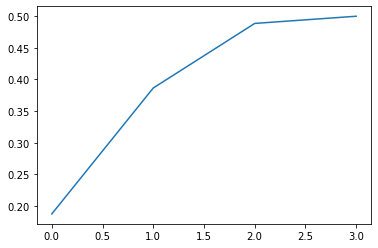

In [44]:
mean_list1 = []
std_list1 = []
mean_list2 = []
std_list2 = []
mean_list3 = []
std_list3 = []
mean_list4 = []
std_list4 = []
for class_name, numbers in class_name_to_num.items():
    one_class1 = []
    one_class2 = []
    syn_class = []
    lam_class = []
    for rule in range(256):
        if rule in ca_classification[class_name]:
            one_class1.append(cell_ei_list1[rule])
            one_class2.append(cell_ei_list2[rule])
            syn_class.append(syn_list[rule])
            lam_class.append(lam_list[rule])
            
    mean_list1.append(np.mean(one_class1))
    std_list1.append(np.std(one_class1))
    mean_list2.append(np.mean(one_class2))
    std_list2.append(np.std(one_class2))
    mean_list3.append(np.mean(syn_class))
    std_list3.append(np.std(syn_class))
    mean_list4.append(np.mean(lam_class))
    std_list4.append(np.std(lam_class))
    
mean_list1 = np.array(mean_list1)
mean_list2 = np.array(mean_list2)
mean_list3 = np.array(mean_list3)
mean_list4 = np.array(mean_list4)
std_list1 = np.array(std_list1)
std_list2 = np.array(std_list2)
std_list3 = np.array(std_list3)
std_list4 = np.array(std_list4)

plt.plot(mean_list4)

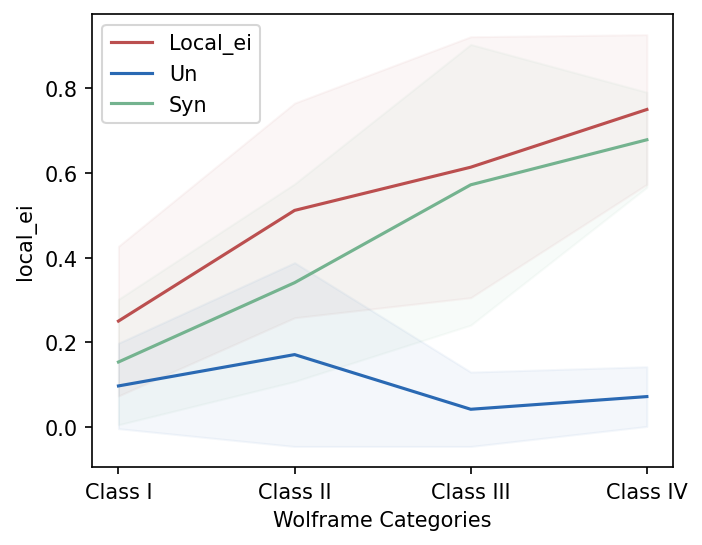

In [45]:
plt.figure(figsize=(5,4), dpi=150)
x_labels = ['Class I', 'Class II', 'Class III', 'Class IV']
# 绘制折线图
plt.plot(x_labels, mean_list1, color='#BB4F4F', label='Local_ei')
plt.fill_between(x_labels, mean_list1+std_list1, mean_list1-std_list1, color='#BB4F4F', alpha=0.05)
plt.plot(x_labels, mean_list2, color='#2A69B3', label='Un')
plt.fill_between(x_labels, mean_list2+std_list2, mean_list2-std_list2, color='#2A69B3', alpha=0.05)
plt.plot(x_labels, mean_list3, color='#74B38F', label='Syn')
plt.fill_between(x_labels, mean_list3+std_list3, mean_list3-std_list3, color='#74B38F', alpha=0.05)
#plt.plot(x_labels, mean_list4, color='#FFA500', label='Lam')
#plt.fill_between(x_labels, mean_list4+std_list4, mean_list4-std_list4, color='#FFA500', alpha=0.05)
# 添加图表标题和轴标签
#plt.title('Mean Values with Standard Deviation Error Bars')
plt.xlabel('Wolframe Categories')
plt.ylabel('local_ei')

# 显示图例
plt.legend()

# 显示图表
plt.show()

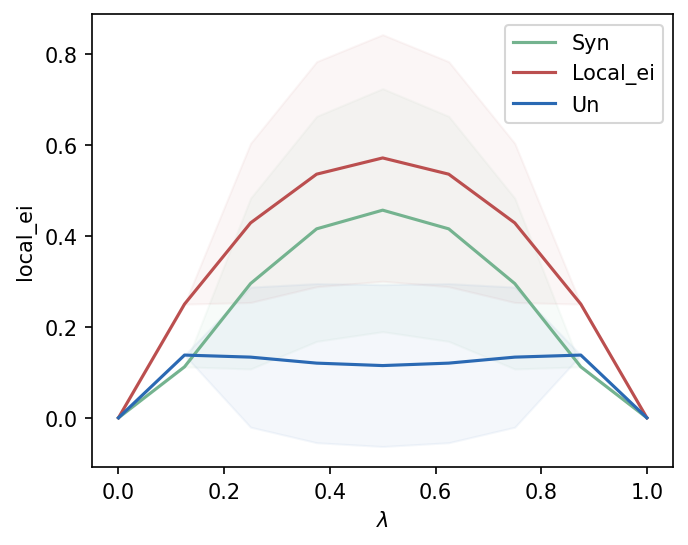

In [46]:
langton_lams = {i:[] for i in range(9)}
langton_lams1 = {i:[] for i in range(9)}
langton_lams2 = {i:[] for i in range(9)}
for r in range(256):
    idx = int(langton(r) * 8)
    langton_lams[idx].append(syn_list[r])
    langton_lams1[idx].append(cell_ei_list1[r])
    langton_lams2[idx].append(cell_ei_list2[r])

means = np.array([np.mean(values) for values in langton_lams.values()])
std_devs = np.array([np.std(values) for values in langton_lams.values()])
means1 = np.array([np.mean(values) for values in langton_lams1.values()])
std_devs1 = np.array([np.std(values) for values in langton_lams1.values()])
means2 = np.array([np.mean(values) for values in langton_lams2.values()])
std_devs2 = np.array([np.std(values) for values in langton_lams2.values()])

plt.figure(figsize=(5,4), dpi=150)
# 绘制折线图
plt.plot([i/8 for i in range(9)], means, color='#74B38F', label='Syn')
plt.fill_between([i/8 for i in range(9)], means+std_devs, means-std_devs, color='#74B38F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means1, color='#BB4F4F', label='Local_ei')
plt.fill_between([i/8 for i in range(9)], means1+std_devs1, means1-std_devs1, color='#BB4F4F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means2, color='#2A69B3', label='Un')
plt.fill_between([i/8 for i in range(9)], means2+std_devs2, means2-std_devs2, color='#2A69B3', alpha=0.05)
plt.xlabel('$\lambda$')
plt.ylabel('local_ei')
plt.legend()

# 已知动力学 动力学同质

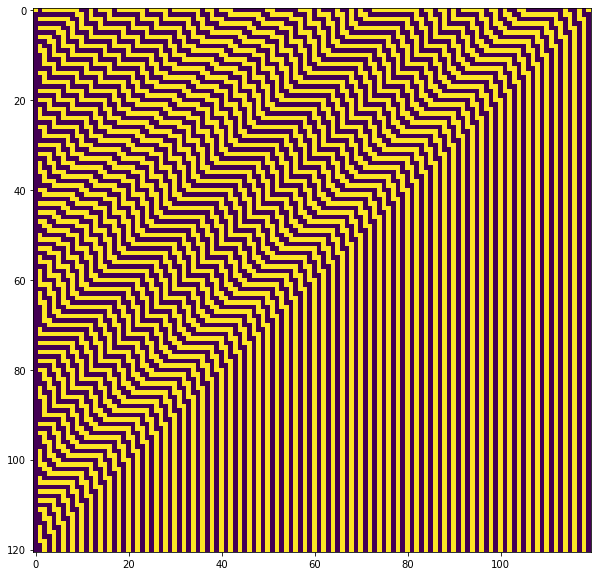

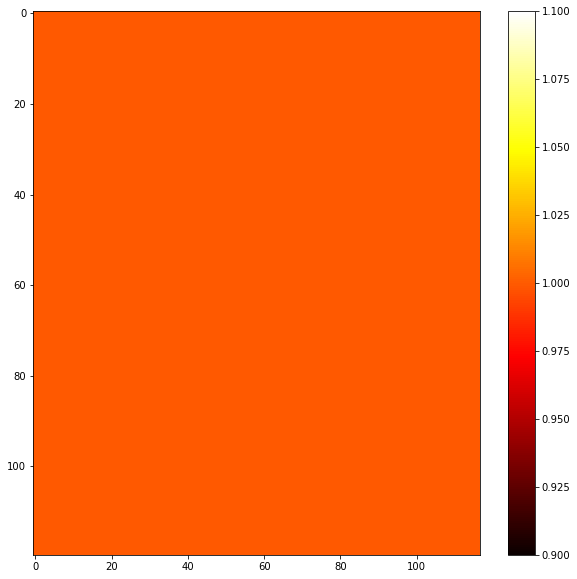

In [31]:

seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton2(rule=170, generations=120, p0_list=[0], size=120, middle_size=2)


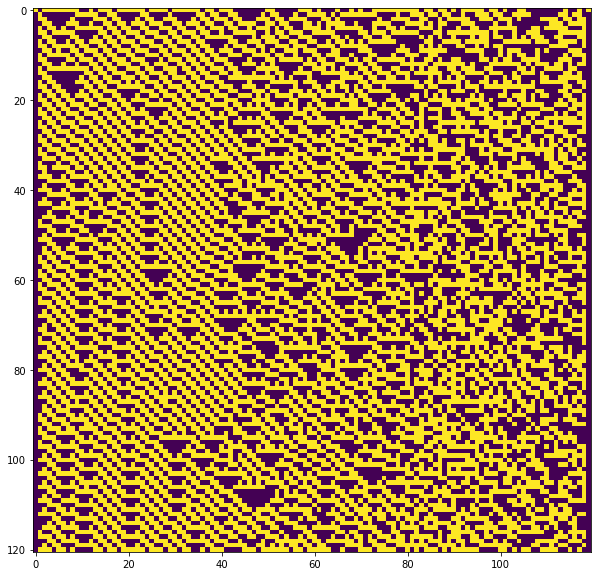

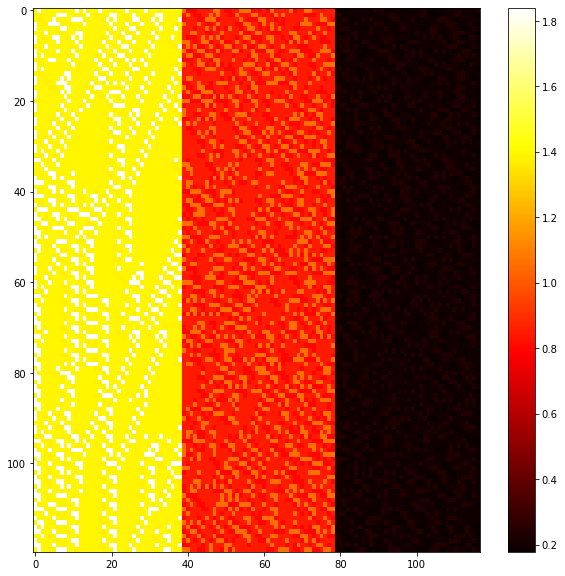

In [4]:

seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton2(rule=110, generations=120, p0_list=[0.01,0.1,0.3], size=120, middle_size=2)


# 已知动力学 动力学异质 时空噪声

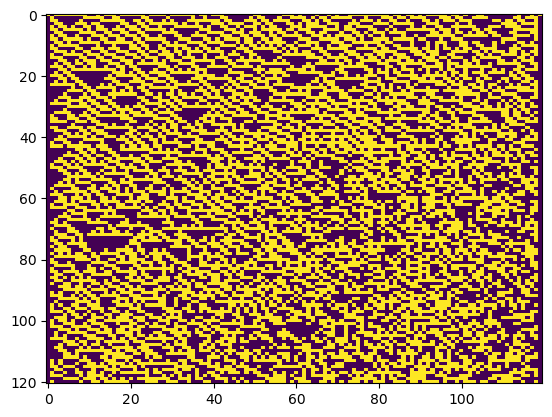

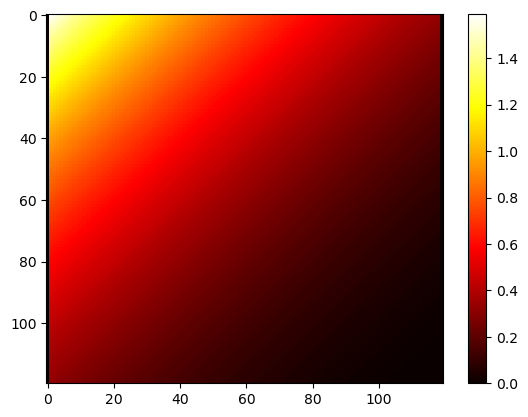

In [2]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton_2d(rule=110, generations=120,  size=120, middle_size=2)